In [350]:
import matplotlib.pyplot as plt

In [354]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

random_state = None

# create random data with two classes
X, Y = make_blobs(n_samples=16, n_features=2, centers=2, center_box=(-2, 2), random_state=random_state)

# scale the data so that all values are between 0.0 and 1.0
X = MinMaxScaler().fit_transform(X)

# split two data points from the data as test data and
# use the remaining n-2 points as the training data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=2, random_state=random_state)

# place-holder for the predicted classes
y_predict = np.empty(len(y_test), dtype=np.int64)

# produce line segments that connect the test data points
# to the nearest neighbors for drawing the chart
lines = []

# distance function
def dist(a, b):
    sum = 0
    for ai, bi in zip(a, b):
        sum = sum + (ai - bi)**2
    return np.sqrt(sum)


def main(X_train, X_test, y_train, y_test):

    global y_predict
    global lines

    k = 3    # classify our test items based on the classes of 3 nearest neighbors

    # process each of the test data points
    for i, test_item in enumerate(X_test):
        # calculate the distances to all training points
        distances = [dist(train_item, test_item) for train_item in X_train]

        # add your code here
        nearest = np.argmin(distances)       # this just finds the nearest neighbour (so k=1)
        idx = np.argpartition(distances, k)
        
        # create a line connecting the points for the chart
        # you may change this to do the same for all the k nearest neigbhors if you like
        # but it will not be checked in the tests
        for j in idx[:k]:
            lines.append(np.stack((test_item, X_train[j])))
            
        res = np.bincount(y_train[idx[:k]]).argmax()

        y_predict[i] = res          # this just classifies everything as 0
    
    print(y_predict)

main(X_train, X_test, y_train, y_test)


[1 1]


In [355]:
lan_train = X_train[:, 0]
lat_train = X_train[:, -1]
lan_test = X_test[:, 0]
lat_test = X_test[:, -1]

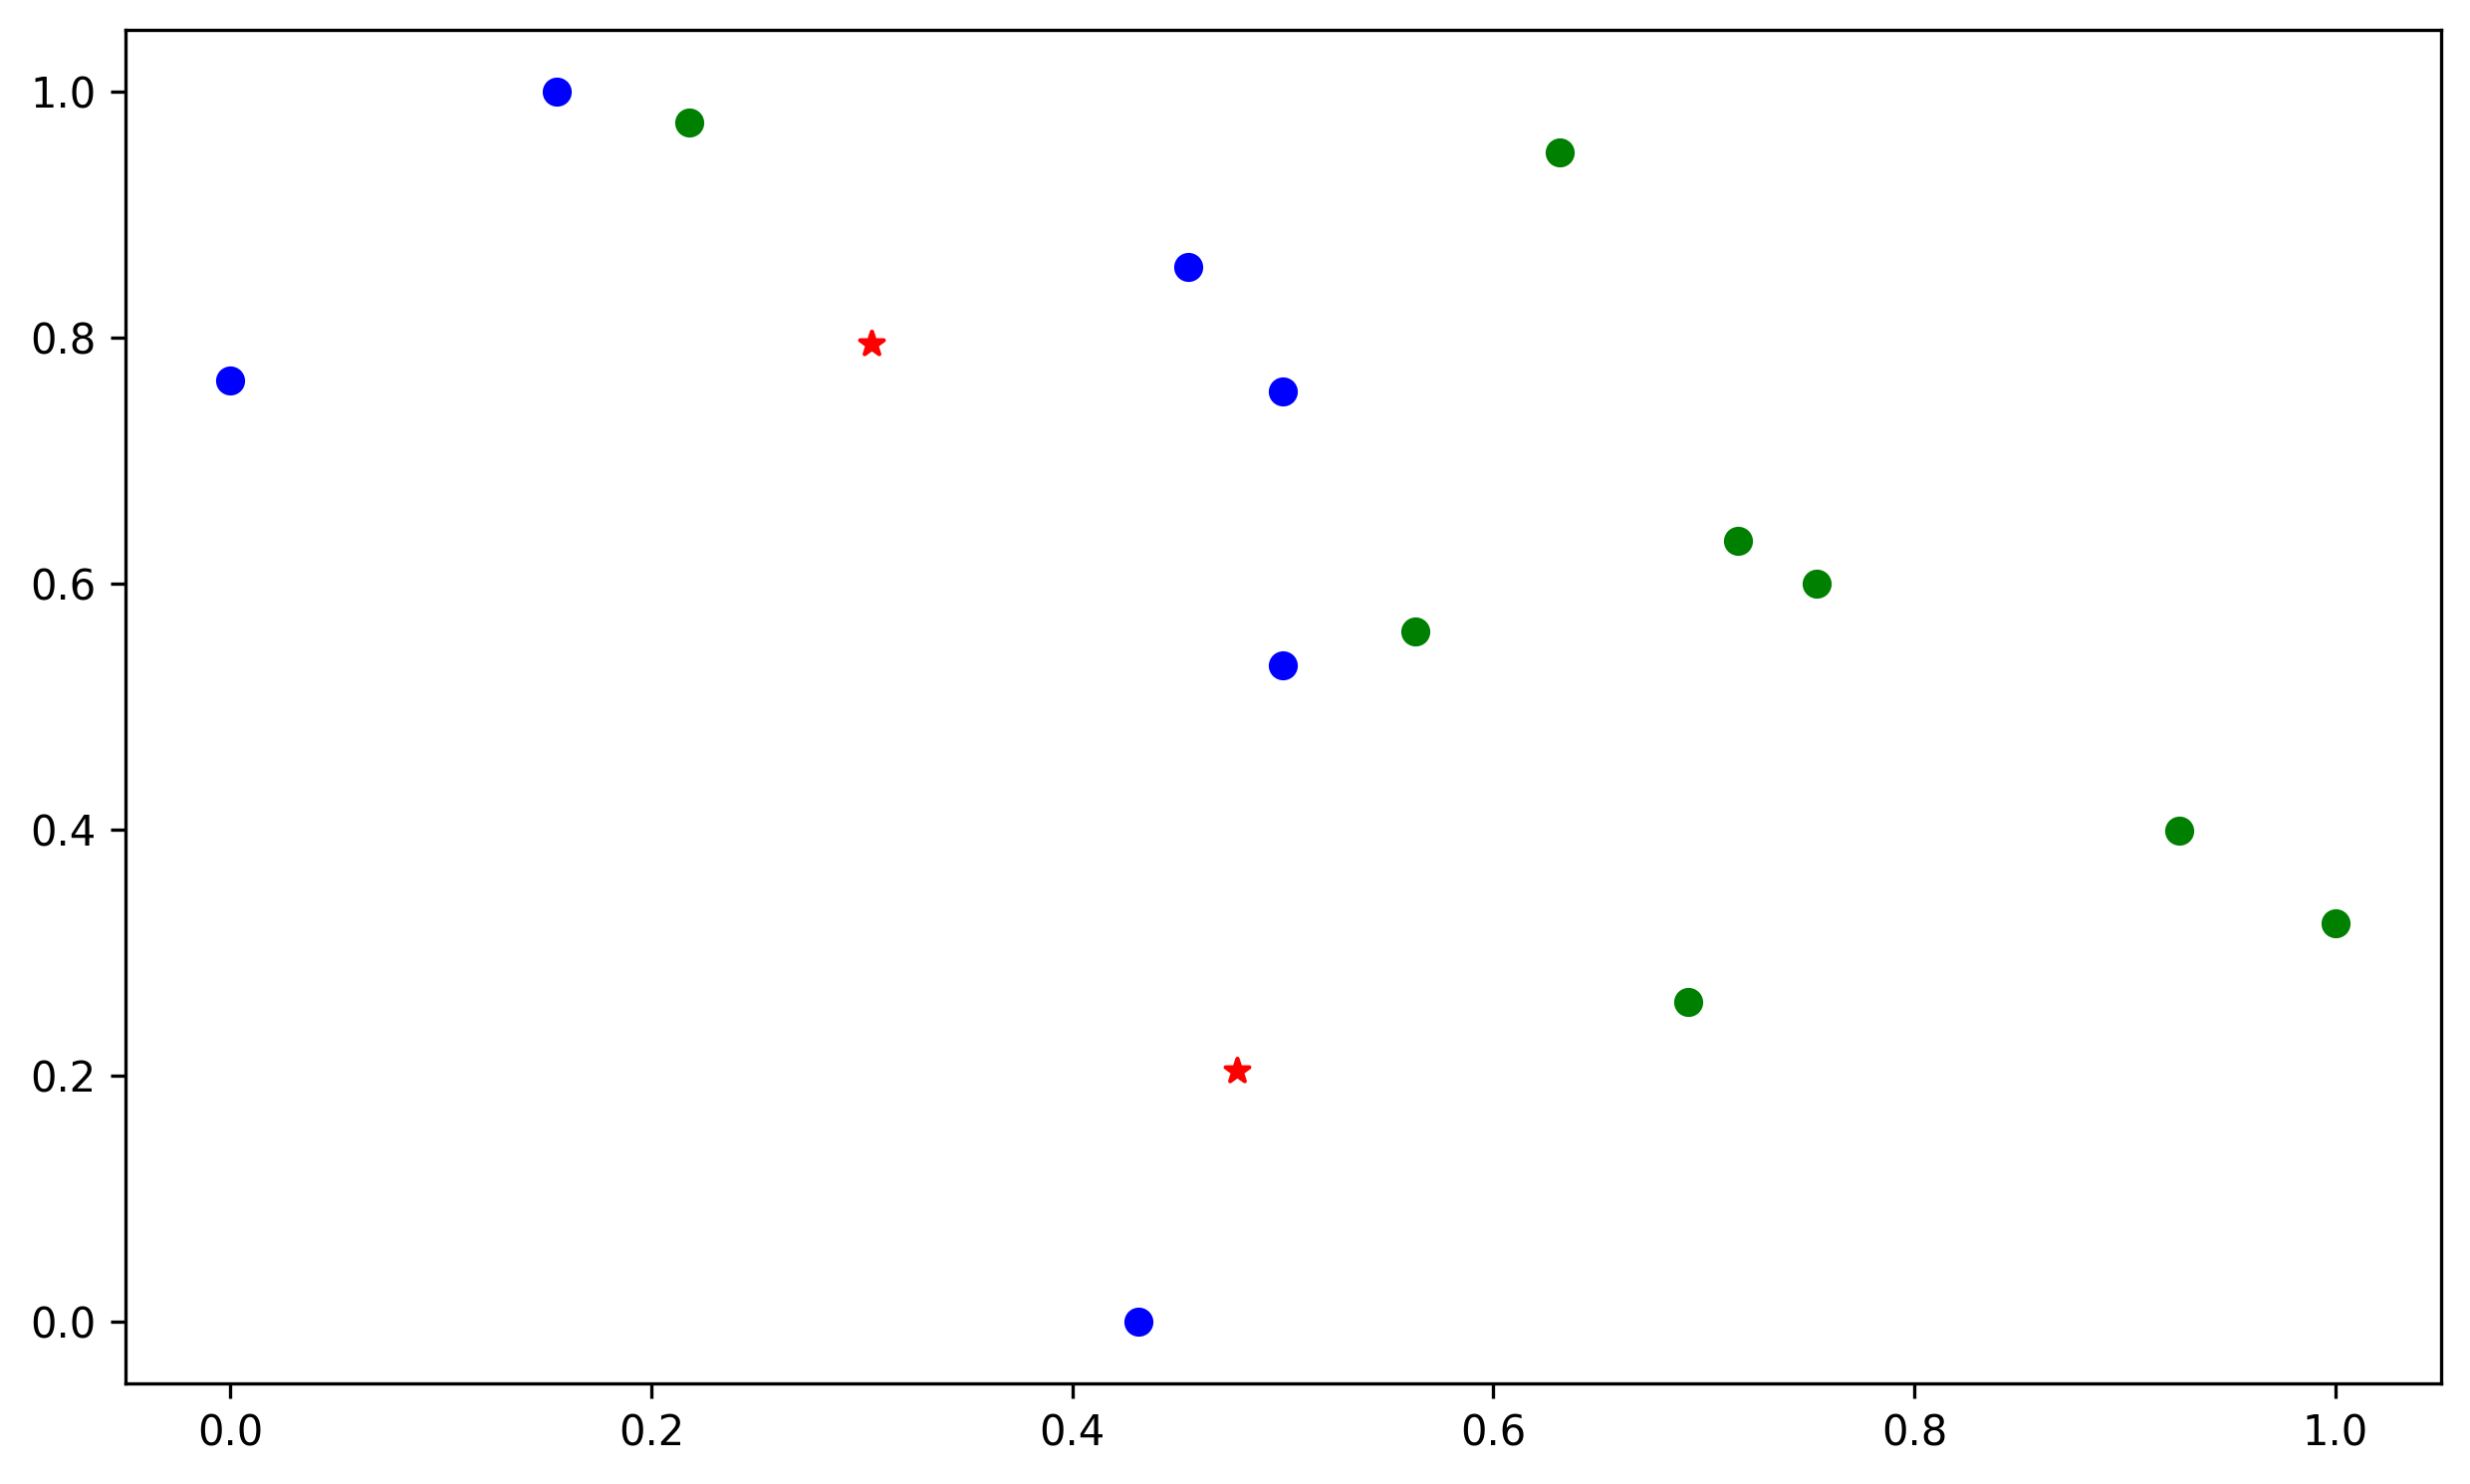

In [363]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6], dpi=300)

for i, j in enumerate(y_train):
    if j == 1:
        plt.scatter(lan_train[i], lat_train[i], color="blue", marker='o')
    else:
        plt.scatter(lan_train[i], lat_train[i], color="green", marker='o')
        
plt.scatter(lan_test, lat_test, color="red", marker='*')

plt.show()